<a href="https://colab.research.google.com/github/donatgithub12/animal_dentification/blob/main/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [ ]:
import os  # for accessing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # for image prosessing
from google.colab.patches import cv2_imshow
from PIL import Image #PIL -> pillow libary used for image processing libraries
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #extracting the compessed Dataset
from zipfile import ZipFile
dataset='/content/drive/MyDrive/cat dog monkey.zip'

with ZipFile(dataset,'r') as zip:  # r for reading the file
  zip.extractall()
  print('the dataset is extacted')

the dataset is extacted


In [ ]:
cat = os.listdir('/content/cat dog monkey/cat') # create list contain files with mask
print(cat[:5])  # print the first five elements
print(cat[-5:]) # print the last five elements of the list

['cats_095.jpg', 'cats_077.jpg', 'cats_083.jpg', 'cats_089.jpg', 'cats_097.jpg']
['cats_069.jpg', 'cats_052.jpg', 'cats_044.jpg', 'cats_025.jpg', 'cats_018.jpg']


In [ ]:
cat_and_monkeys = os.listdir('/content/cat dog monkey/cat and monkeys') # create list contain files with mask
print(cat_and_monkeys[:5])  # print the first five elements
print(cat_and_monkeys[-5:]) # print the last five elements of the list

['cats_and_monkeys_023.jpg', 'cats_and_monkeys_015.jpg', 'cats_and_monkeys_024.jpg', 'cats_and_monkeys_019.jpg', 'cats_and_monkeys_017.jpg']
['cats_and_monkeys_068.jpg', 'cats_and_monkeys_071.jpg', 'cats_and_monkeys_021.jpg', 'cats_and_monkeys_044.jpg', 'cats_and_monkeys_093.jpg']


In [ ]:
cat_groups = os.listdir('/content/cat dog monkey/cat groups') # create list contain files with mask
print(cat_groups[:5])  # print the first five elements
print(cat_groups[-5:]) # print the last five elements of the list

['cats_groups_009.jpg', 'cats_groups_044.jpg', 'cats_groups_070.jpg', 'cats_groups_026.jpg', 'cats_groups_001.jpg']
['cats_groups_012.jpg', 'cats_groups_097.jpg', 'cats_groups_007.jpg', 'cats_groups_028.jpg', 'cats_groups_071.jpg']


In [ ]:
dog = os.listdir('/content/cat dog monkey/dog') # create list contain files with mask
print(dog[:5])  # print the first five elements
print(dog[-5:]) # print the last five elements of the list

['dogs_015.jpg', 'dogs_034.jpg', 'dogs_020.jpg', 'dogs_053.jpg', 'dogs_006.jpg']
['dogs_046.jpg', 'dogs_097.jpg', 'dogs_030.jpg', 'dogs_027.jpg', 'dogs_018.jpg']


In [ ]:
dog_and_cats = os.listdir('/content/cat dog monkey/dog and cats') # create list contain files with mask
print(dog_and_cats[:5])  # print the first five elements
print(dog_and_cats[-5:]) # print the last five elements of the list

['dogs_and_cats_031.jpg', 'dogs_and_cats_002.jpg', 'dogs_and_cats_020.jpg', 'dogs_and_cats_023.jpg', 'dogs_and_cats_034.jpg']
['dogs_and_cats_044.jpg', 'dogs_and_cats_095.jpg', 'dogs_and_cats_000.jpg', 'dogs_and_cats_012.jpg', 'dogs_and_cats_054.jpg']


In [ ]:
dog_and_monkey = os.listdir('/content/cat dog monkey/dog and monkey') # create list contain files with mask
print(dog_and_monkey[:5])  # print the first five elements
print(dog_and_monkey[-5:]) # print the last five elements of the list

['dog_and_monkey_012.jpg', 'dog_and_monkey_000.jpg', 'dog_and_monkey_023.jpg', 'dog_and_monkey_024.jpg', 'dog_and_monkey_057.jpg']
['dog_and_monkey_039.jpg', 'dog_and_monkey_078.jpg', 'dog_and_monkey_045.jpg', 'dog_and_monkey_085.jpg', 'dog_and_monkey_022.jpg']


In [ ]:
dogs_group = os.listdir('/content/cat dog monkey/dogs group') # create list contain files with mask
print(dogs_group[:5])  # print the first five elements
print(dogs_group[-5:]) # print the last five elements of the list

['dogs_groups_063.jpg', 'dogs_groups_002.jpg', 'dogs_groups_049.jpg', 'dogs_groups_007.jpg', 'dogs_groups_088.jpg']
['dogs_groups_089.jpg', 'dogs_groups_019.jpg', 'dogs_groups_082.jpg', 'dogs_groups_017.jpg', 'dogs_groups_004.jpg']


In [ ]:
monkey_groups = os.listdir('/content/cat dog monkey/monkey groups') # create list contain files with mask
print(monkey_groups[:5])  # print the first five elements
print(monkey_groups[-5:]) # print the last five elements of the list

['monkey_groups_097.jpg', 'monkey_groups_095.jpg', 'monkey_groups_000.jpg', 'monkey_groups_050.jpg', 'monkey_groups_066.jpg']
['monkey_groups_083.jpg', 'monkey_groups_055.jpg', 'monkey_groups_014.jpg', 'monkey_groups_021.jpg', 'monkey_groups_074.jpg']


In [ ]:
monkeys=os.listdir('/content/cat dog monkey/monkeys') # create list contain files without mask
print(monkeys[:5])  # print the first five elements
print(monkeys[-5:])  # print the last five elements of the list

['monkeys_005.jpg', 'monkeys_063.jpg', 'monkeys_032.jpg', 'monkeys_039.jpg', 'monkeys_014.jpg']
['monkeys_036.jpg', 'monkeys_024.jpg', 'monkeys_064.jpg', 'monkeys_089.jpg', 'monkeys_021.jpg']


In [ ]:
print('Cat:',len(cat))
print('cat and monkeys:', len(cat_and_monkeys))
print('cat groups:', len(cat_groups))
print('dog:', len(dog))
print('dog and cats:', len(dog_and_cats))
print('dog and monkey:', len(dog_and_monkey))
print('dogs group:', len(dogs_group))
print('monkey groups:', len(monkey_groups))
print('monkeys:', len(monkeys))

Cat: 86
cat and monkeys: 31
cat groups: 46
dog: 82
dog and cats: 54
dog and monkey: 31
dogs group: 21
monkey groups: 40
monkeys: 78


Creating lables for the two class of images

with masks-> 0


withoutmask -> 1


In [ ]:
#creating the labels
cat_labels = [0]*86
cat_and_monkeys_labels = [1]*31
cat_groups_labels = [2]*46
dog_labels = [3]*82
dog_and_cats_labels = [4]*54
dog_and_monkey_labels = [5]*31
dogs_group_labels = [6]*21
monkey_groups_labels = [7]*40
monkeys_labels = [8]*78

In [ ]:
print(cat_labels[:5])
print(cat_and_monkeys_labels[:5])
print(cat_groups_labels[:5])
print(dog_labels[:5])
print(dog_and_cats_labels[:5])
print(dog_and_monkey_labels[:5])
print(dogs_group_labels[:5])
print(monkey_groups_labels[:5])
print(monkeys_labels[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]
[5, 5, 5, 5, 5]
[6, 6, 6, 6, 6]
[7, 7, 7, 7, 7]
[8, 8, 8, 8, 8]


In [ ]:
print(len(cat_labels))
print(len(cat_and_monkeys_labels))
print(len(cat_groups_labels))
print(len(dog_labels))
print(len(dog_and_cats_labels))
print(len(dog_and_monkey_labels))
print(len(dogs_group_labels))
print(len(monkey_groups_labels))
print(len(monkeys_labels))

86
31
46
82
54
31
21
40
78


In [ ]:
labels = cat_labels + cat_and_monkeys_labels + cat_groups_labels + dog_labels + dog_and_cats_labels + dog_and_monkey_labels + dogs_group_labels + monkey_groups_labels + monkeys_labels# adding the to list

print(len(labels))
print(labels[0:5])
print(labels[-5:])

469
[0, 0, 0, 0, 0]
[8, 8, 8, 8, 8]


Displaying the images


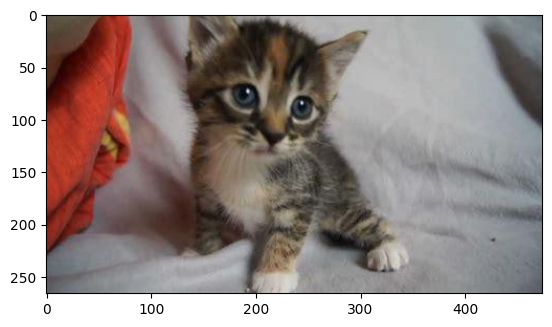

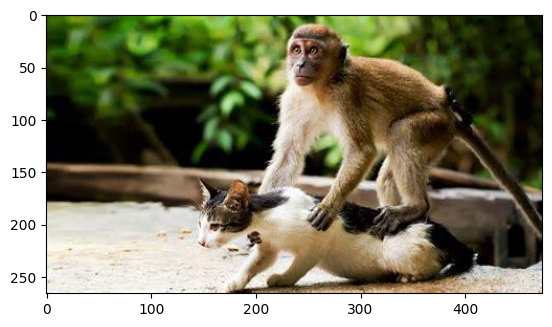

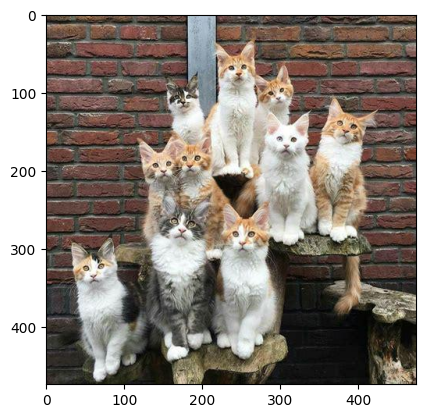

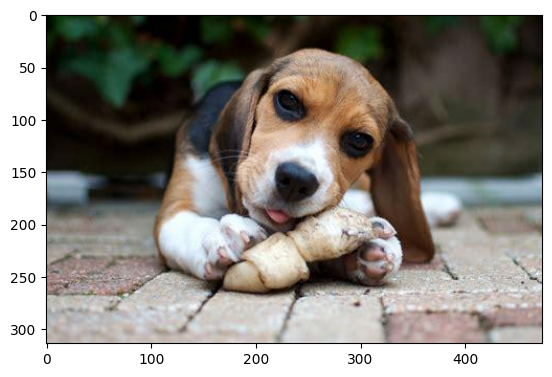

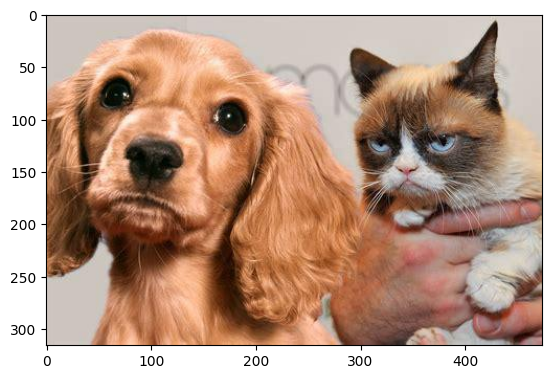

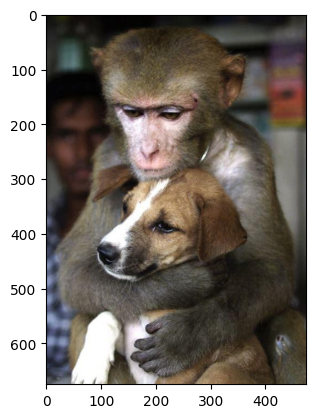

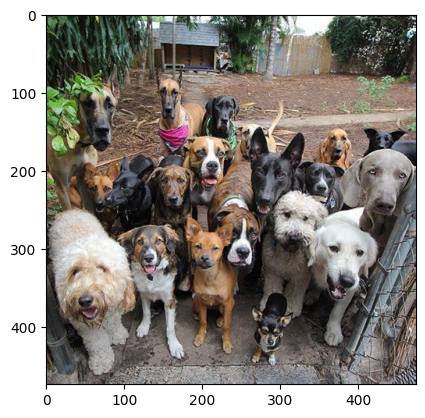

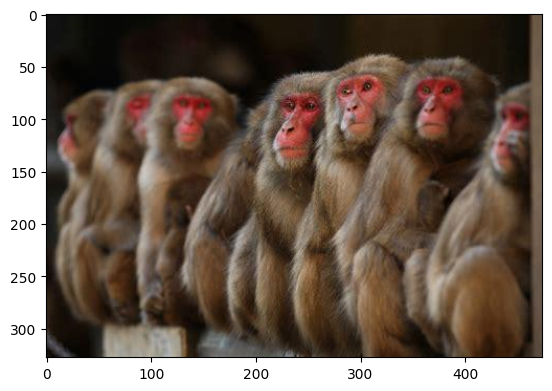

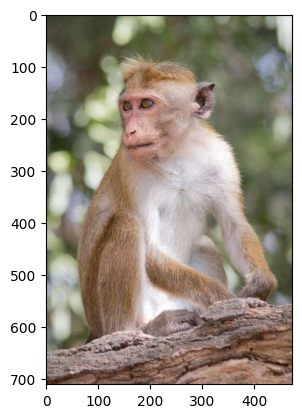

In [ ]:
# dispolaying with mask image
img=mpimg.imread('/content/cat dog monkey/cat/cats_001.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/cat and monkeys/cats_and_monkeys_001.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/cat groups/cats_groups_000.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/dog/dogs_000.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/dog and cats/dogs_and_cats_000.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/dog and monkey/dog_and_monkey_000.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/dogs group/dogs_groups_002.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/monkey groups/monkey_groups_000.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('/content/cat dog monkey/monkeys/monkeys_000.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()



Image Processing

Resize the images

image processing

1.Resize the images


2.Convert the images to numpy arrays

In [ ]:
#convert images to numpy arrays
cat_path = '/content/cat dog monkey/cat/' # don't forgot to add /
data = [] # create a empty list


for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/cat and monkeys/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/cat groups/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/dog/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/dog and cats/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/dog and monkey/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/dogs group/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/monkey groups/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data

cat_path = '/content/cat dog monkey/monkeys/' # don't forgot to add /

for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


array([[[232, 236, 245],
        [229, 233, 242],
        [230, 234, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 230, 239],
        [223, 227, 236],
        [225, 229, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 230, 239],
        [223, 227, 236],
        [224, 228, 237],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 27,  25,  26],
        [ 25,  23,  24],
        [ 24,  22,  23],
        ...,
        [ 23,  22,  20],
        [ 22,  20,  21],
        [ 19,  17,  18]],

       [[ 26,  24,  25],
        [ 26,  24,  25],
        [ 24,  22,  23],
        ...,
        [ 24,  23,  21],
        [ 23,  21,  22],
        [ 25,  23,  24]],

       [[ 34,  32,  33],
        [ 26,  24,  25],
        [ 24,  22,  23],
        ...,
        [ 26,  24,  23],
        [ 25,  23,  24],
        [ 34,  32,  33]]], dtype=uint8)
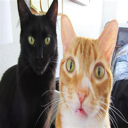

In [ ]:
data[0]

In [ ]:
len(data)

469

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,

Train test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(469, 128, 128, 3) (375, 128, 128, 3) (94, 128, 128, 3)


In [ ]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99215686, 0.99607843, 1.        ],
        [1.        , 1.        , 1.        ],
        [0.56078431, 0

Building a convolutional Netural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 9
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
#compile the nerual network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [ ]:
#training the neural network
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=10)

Epoch 1/10
11/11 [==============================] - 16s 1s/step - loss: 2.4249 - acc: 0.1454 - val_loss: 2.1516 - val_acc: 0.1316
Epoch 2/10
11/11 [==============================] - 14s 1s/step - loss: 2.1372 - acc: 0.1780 - val_loss: 2.1245 - val_acc: 0.2105
Epoch 3/10
11/11 [==============================] - 14s 1s/step - loss: 2.0872 - acc: 0.2018 - val_loss: 2.0925 - val_acc: 0.2368
Epoch 4/10
11/11 [==============================] - 13s 1s/step - loss: 2.0006 - acc: 0.2908 - val_loss: 2.1209 - val_acc: 0.2105
Epoch 5/10
11/11 [==============================] - 14s 1s/step - loss: 1.8443 - acc: 0.3976 - val_loss: 2.1847 - val_acc: 0.1842
Epoch 6/10
11/11 [==============================] - 15s 1s/step - loss: 1.6430 - acc: 0.4095 - val_loss: 2.2961 - val_acc: 0.2105
Epoch 7/10
11/11 [==============================] - 14s 1s/step - loss: 1.2455 - acc: 0.5697 - val_loss: 2.3404 - val_acc: 0.1842
Epoch 8/10
11/11 [==============================] - 14s 1s/step - loss: 0.9496 - acc: 0.69

model evaluation

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy= ', accuracy)

3/3 [==============================] - 1s 458ms/step - loss: 3.3278 - acc: 0.2447
Test Accuracy=  0.24468085169792175


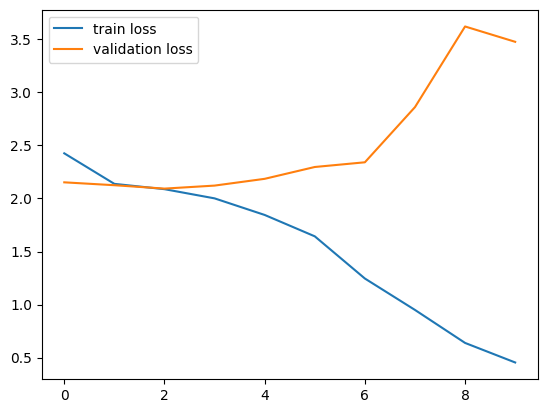

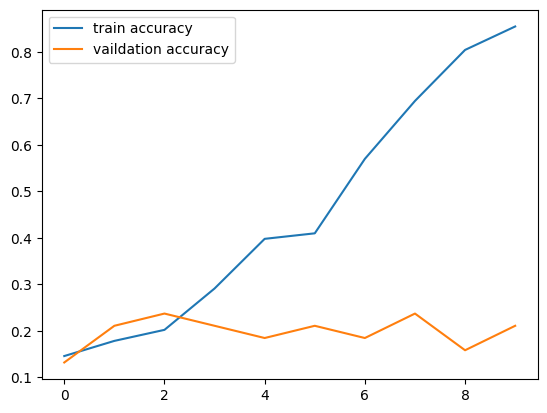

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='vaildation accuracy')
plt.legend()
plt.show()

predictive System

path of the image to be pedicted: /content/cat dog monkey/monkeys/monkeys_011.jpg


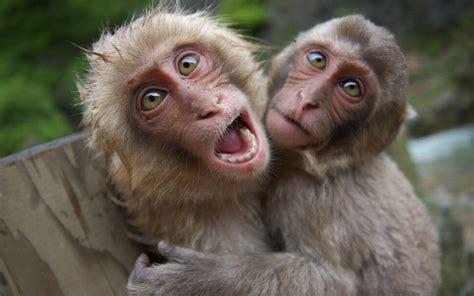

1/1 [==============================] - 0s 37ms/step
[[9.0228312e-02 4.3344391e-03 1.0568099e-02 1.8314493e-04 4.4871305e-04
  1.0069600e-02 7.6303986e-04 1.3468963e-01 7.4871504e-01]]
8
Monkeys


In [ ]:
# @title Default title text
input_image_path = input('path of the image to be pedicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Cat')
elif input_pred_label == 1:
  print('Cat and monkeys')
elif input_pred_label == 2:
  print('Cat groups')
elif input_pred_label == 3:
  print('Dog')
elif input_pred_label == 4:
  print('Dog and cats')
elif input_pred_label == 5:
  print('Dog and monkey')
elif input_pred_label == 6:
  print('Dogs group')
elif input_pred_label == 7:
  print('Monkey groups')
else:
  print('Monkeys')